(array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 120, 160, 210]), array([156,  69,  29,  17,  10,   9,   4,   2,   3,   2,   1,   1,   1]))


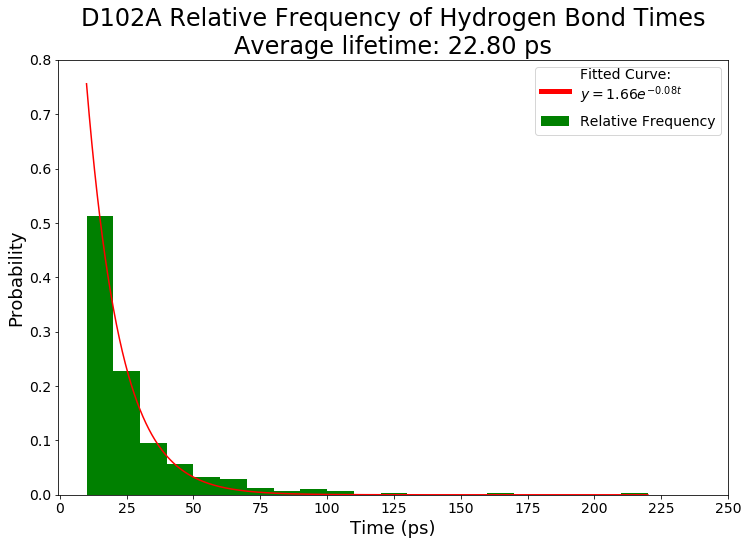

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt
from __future__ import division
from scipy.optimize import curve_fit
import numpy as np

"""
Hydrogen bonds involving last frame are intentionally omitted 
since their duration cannot be calculated
"""

prev = hbond = count = 0 #prev tracks if hbond in previous frame, hbond is bond status, count is bond duration
sizes = [] #list of bond durations
with open("../D102A/hbonds_his_ser.dat") as f:
    for line in f:
        line = line.split() #splits line by whitespace
        hbond = int(line[1])
        if hbond == 1:
            count += 1
            prev = 1
        elif hbond == 0 and prev == 1: 
            #if the hbond terminates
            sizes.append(count)
            count = prev = 0
        else:
            #hbond == 0 and prev == 0, nothing happens
            continue
            
sizes = [x*10 for x in sizes]
weights = np.ones_like(sizes)/float(len(sizes)) #weighting for relative frequency
# print(sum(sizes)/len(sizes)) #prints average lifetime
print(np.unique(sizes, return_counts=True))
# print(len(sizes))

#Plotting & Saving
plt.figure(figsize=(12, 8))

#Histogram of the data
n, bins, patches = plt.hist(sizes, color='g', weights=weights, bins=range(10, max(sizes)+20, 10), label='Relative Frequency') #generates rel. freq. histogram

def func(x, a, b):
    return a * np.exp(-b * x)

#Best-fit exponential
bins = [0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)]
popt, pcov = curve_fit(func, bins, n, p0=(4, .1))
x = np.linspace(10, 220, 2100)
A, K = popt
plt.plot(x, func(x, *popt), 'r-', label='Fitted Curve:\n$y = %0.2f e^{-%0.2f t}$' % (A, K))

plt.title("D102A Relative Frequency of Hydrogen Bond Times\nAverage lifetime: {:0.2f} ps".format(sum(sizes)/len(sizes)), fontsize=24)
plt.xlabel("Time (ps)", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.xticks(np.arange(0, 251, 25), fontsize=14)
plt.yticks(np.arange(0, 0.81, 0.1), fontsize=14)
lgnd = plt.legend(prop={'size': 14})
lgnd.legendHandles[0].set_linewidth(5.0)
lgnd.legendHandles[1].set_linewidth(5.0)
plt.savefig('../figures/d102a_hbond_times.eps', format='eps', dpi=1000, bbox_inches='tight')

(array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        130,  140,  160,  170,  190,  230,  300,  390,  430,  440,  560,
       1930]), array([60, 11, 15,  9,  9,  6,  6,  3,  3,  3,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1]))


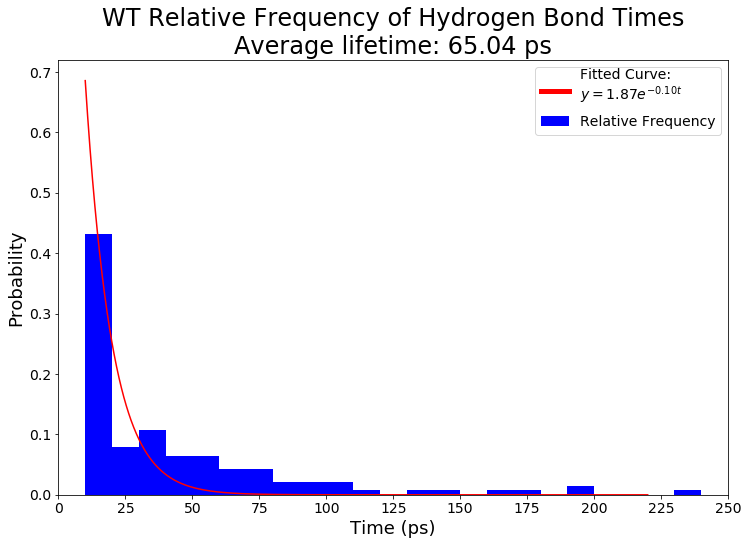

In [5]:
"""
Hydrogen bonds involving last frame are intentionally omitted 
since their duration cannot be calculated
"""

prev = hbond = count = 0 #prev tracks if hbond in previous frame, hbond is bond status, count is bond duration
sizes = [] #list of bond durations
with open("../WT/hbonds_his_ser.dat") as f:
    for line in f:
        line = line.split() #splits line by whitespace
        hbond = int(line[1])
        if hbond == 1:
            count += 1
            prev = 1
        elif hbond == 0 and prev == 1: 
            #if the hbond terminates
            sizes.append(count)
            count = prev = 0

sizes = [x*10 for x in sizes]
weights = np.ones_like(sizes)/float(len(sizes)) #weighting for relative frequency
# print(sum(sizes)/len(sizes)) #prints average lifetime
print(np.unique(sizes, return_counts=True))
#Plotting & Saving
plt.figure(figsize=(12, 8))
#Histogram
n, bins, patches = plt.hist(sizes, color='b', weights=weights, bins=range(10, max(sizes)+20, 10), label='Relative Frequency') #generates rel. freq. histogram


def func(x, a, b):
    return a * np.exp(-b * x)

#Best-fit exponential
bins = [0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)]
popt, pcov = curve_fit(func, bins, n, p0=(4, 0.1))
x = np.linspace(10, 220, 2100)
A, K = popt
plt.plot(x, func(x, *popt), 'r-', label='Fitted Curve:\n$y = %0.2f e^{-%0.2f t}$' % (A, K))

plt.title("WT Relative Frequency of Hydrogen Bond Times\nAverage lifetime: {:0.2f} ps".format(sum(sizes)/len(sizes)), fontsize=24)
plt.xlabel("Time (ps)", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.xlim((0, 250))
plt.xticks(np.arange(0, 251, 25), fontsize=14)
plt.yticks(np.arange(0, 0.71, 0.1), fontsize=14)
lgnd = plt.legend(prop={'size': 14})
lgnd.legendHandles[0].set_linewidth(5.0)
lgnd.legendHandles[1].set_linewidth(5.0)
plt.savefig('../figures/wt_hbond_times.eps', format='eps', dpi=1000, bbox_inches='tight')